## Esercizio 1

Si consideri il polinomio $$L(x)=(1/2) (5x^3-3x)$$ $x \in [-1,1]$

Si visualizzi il grafico del polinomio in [-1,1]

- Si implementi il metodo di Newton per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

- Si implementi il metodo di Bisezione per la determinazione degli zeri di un'equazione non lineare [**Punti 4**]

- Si utilizzi il metodo di Newton con iterato iniziale $x_0=1$ per determinare lo zero $x^*$ piu' vicino ad 1. [**Punti 2**]

Si consideri la funzione $q(x)=L(x)/(x-x^*)$ dove $x^*$ è lo zero calcolato nel punto precedente. Si applichi il metodo di Newton con iterato iniziale $x_0=-0.5$ per calcolare uno zero della funzione $q(x)$  e si verifichi che è anche zero di $L(x)$  [**Punti 2**]

Si applichi il metodo di bisezione alle funzioni $q(x)$ ed $L(x)$ definite in [-1,1] e si fornisca una spiegazione teorica dei risultati ottenuti  [**Punti 2**]

                                                                                                                Punti [14]

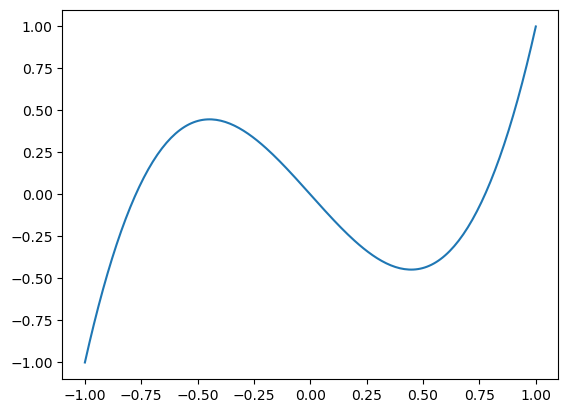

In [12]:
import numpy as np
import matplotlib.pyplot as plt
L = lambda x: (1/2)*(5*x**3-3*x)
x = np.linspace(-1,1,200)
y = L(x)
plt.plot(x,y)
plt.show()

In [44]:
def newton(fname,fpname,x0,tolx,tolf,nmax):
        xk=[]
        fx0=fname(x0)
        it=1
        if abs(fpname(x0))<=np.spacing(1):
            print(" derivata prima nulla in x0")
            print(it)
            return None, None,None
        
        d=fx0/fpname(x0)
        x1=x0-d
        
        fx1=fname(x1)
        xk.append(x1)
        
        
        while it<=nmax and abs(fx1)>=tolf and abs(d)>=tolx*abs(x1):
           x0=x1
           fx0= fname(x0)
           if abs(fpname(x0))<=np.spacing(1): #Se la derivata prima e' pià piccola della precisione di macchina stop
                print(" derivata prima nulla in x0")
                print(it)
                return None, None,None
           d=fx0/fpname(x0)
            
           x1=x0-d
           fx1=fname(x1)
           it=it+1
         
           xk.append(x1)
          
        if it==nmax:
            print('raggiunto massimo numero di iterazioni \n')
            
        
        return x1,it,xk

In [46]:
Lp = lambda x: 0.5*(15*x**2-3)
tolx = 1e-10
tolf = tolx
nmax = 200
x0 = 1

x_capN,itN,xkN = newton(L,Lp,x0,tolx,tolf,nmax)
print("zero x* più vicino ad 1 => ",x_cap)
print("trovato in ",itN," iterazioni")


zero x* più vicino ad 1 =>  0.7745966692414835
trovato in  5  iterazioni


In [63]:
import math
def sign(n):
    if n>0:
        return 1
    elif n == 0:
        return 0
    return -1
def metodo_bisezione(fname, a, b, tolx,tolf):
 fa=fname(a);
 fb=fname(b);
 if  sign(fa)*sign(fb)>=0:
     print("Non è possibile applicare il metodo di bisezione \n")
     return None, None,None

 it = 0
 v_xk = []

 maxit = math.ceil(math.log((b - a) / tolx) / math.log(2))-1

 
 while abs(b-a)>=tolx:
    xk = a + (b-a)/2
    v_xk.append(xk)
    it += 1
    fxk=fname(xk)
    if fxk==0:
      return xk, it, v_xk

     
    if sign(fa)*sign(fxk)>0:   
       a = xk
       fa = fxk
    elif sign(fxk)*sign(fb)>0:    
       b = xk
       fb = fxk

 
 return xk, it, v_xk

In [65]:
q = lambda x: L(x)/(x-x_capN)
qp = lambda x: (Lp(x)*(x-x_capN)-L(x))/(x-x_capN)**2
x0q = -0.5

newX,it2,xk2 = newton(q,qp,x0q,tolx,tolf,nmax)
print("zero trovato di q(x) => ",newX)

res = L(newX)

if res <= 1 and res >= 0:
    print("è anche uno zero di L")

zero trovato di q(x) =>  -0.7745966692414833
è anche uno zero di L


In [67]:
a = -1
b = 1

zeroL,itL,xkL = metodo_bisezione(L,a,b,tolx,tolf)
zeroQ,itQ,xkQ = metodo_bisezione(q,a,b,tolx,tolf)

print(zeroL)
print(zeroQ)

Non è possibile applicare il metodo di bisezione 

0.0
None


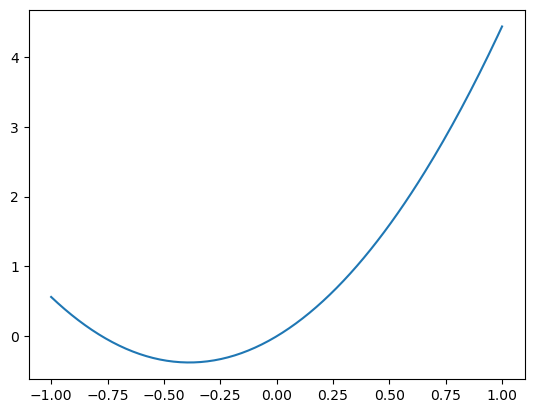

1
1


In [72]:
y = q(x)
plt.plot(x,y)
plt.show()